In [26]:
""" Let's draw a pacman using build data

from apache.buids.org for Hadoop-hdfs-trunk.
"""

from urllib2 import urlopen
import re
import collections
from matplotlib import pyplot as plt

%matplotlib inline

pyApi = 'api/python?pretty=true'
hadoop_hdfs = 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/'
hadoop_projects = collections.OrderedDict()
buildPass = collections.OrderedDict()
buildFail = collections.OrderedDict()

hadoopStats = []
buildStatus = []
buildColors = []

hdfs_builds = eval(urlopen(hadoop_hdfs + pyApi).read())

<type 'dict'>


In [28]:
print hdfs_builds['builds']

[{'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3153/', 'number': 3153}, {'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3152/', 'number': 3152}, {'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3151/', 'number': 3151}, {'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3150/', 'number': 3150}, {'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3149/', 'number': 3149}, {'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3148/', 'number': 3148}, {'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3147/', 'number': 3147}, {'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3146/', 'number': 3146}, {'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3145/', 'number': 3145}, {'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3144/', 'number': 3144}, {'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3143/', 'number': 3143}, {'url': 'https://builds.apache.org/job/Hadoop-Hdfs-trunk/3142/', 'number': 3142}, {'url': 'https:

In [30]:
def getBuildResult(hdfsUri):
    """ Evaluate the values exposed via the Hadoop-hdfs REST endpoints
    
    and fetch the build status for the specific build job.
    """
    
    hdfsApi = eval(urlopen(hdfsUri + pyApi).read())
    buildStatus = hdfsApi['result']
    
    return buildStatus


for hdfs_buildinfo in hdfs_builds['builds']:
    for hdfsKey, hdfsInfo in hdfs_buildinfo.iteritems():
        if "url" in hdfsKey:
            status = getBuildResult(hdfsInfo)
            if status == "SUCCESS":
                buildPass.update({hdfs_buildinfo.get('number') : status})
                print("Status of build {0} is {1}".format(hdfsInfo, status))
            if status == "FAILURE":
                buildFail.update({hdfs_buildinfo.get('number') : status})
                print("Status of build {0} is {1}".format(hdfsInfo, status))

Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3153/ is FAILURE
Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3152/ is FAILURE
Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3151/ is FAILURE
Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3150/ is FAILURE
Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3149/ is FAILURE
Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3148/ is FAILURE
Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3147/ is FAILURE
Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3146/ is FAILURE
Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3145/ is FAILURE
Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3144/ is SUCCESS
Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3143/ is FAILURE
Status of build https://builds.apache.org/job/Hadoop-Hdfs-trunk/3142/ is FAILURE
Status of build https://buil

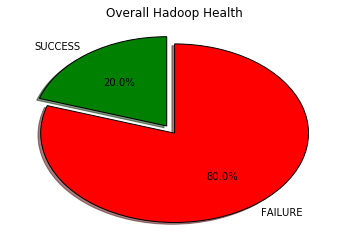

In [37]:
""" Plot pacman based on the total number of

passed and failed hadoop-hdfs-trunk builds.
"""

hadoopStats.append(len(buildPass.keys()))
hadoopStats.append(len(buildFail.keys()))
buildStatus = ['SUCCESS', 'FAILURE']
buildColors = ['g', 'r']

plt.pie(hadoopStats,
       labels=buildStatus,
       colors=buildColors,
       startangle=90,
       shadow=True,
       explode=(0.1,0),
       autopct='%1.1f%%')

plt.title("Continuous Integration Health Monitor -- Hadoop Hdfs Trunk")
plt.show()